In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#https://stackoverflow.com/questions/52305578/sift-cv2-xfeatures2d-sift-create-not-working-even-though-have-contrib-instal
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 3.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


     |████████████████████████████████| 30.6MB 162kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# of keypoints: 453
# of keypoints: 500
# of keypoints: 224


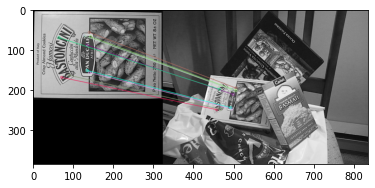

(<matplotlib.image.AxesImage at 0x7fbbcebc6e80>, None)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/box.png',0)          # queryImage
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/box_in_scene.png',0) # trainImage
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
print("# of keypoints: {}".format(len(kp1)))
kp2, des2 = orb.detectAndCompute(img2,None)
print("# of keypoints: {}".format(len(kp2)))
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
print("# of keypoints: {}".format(len(matches)))
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2)
plt.imshow(img3),plt.show()

# kps: 603, descriptors: (603, 128)
# kps: 969, descriptors: (969, 128)
# of keypoints: 603


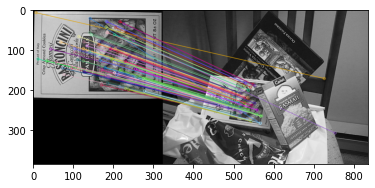

(<matplotlib.image.AxesImage at 0x7fbbcceca550>, None)

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/box.png',0)          # queryImage
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lesson04_IP.rar (Unzipped Files)/Images_New/box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
print("# kps: {}, descriptors: {}".format(len(kp1), des1.shape))
kp2, des2 = sift.detectAndCompute(img2,None)
print("# kps: {}, descriptors: {}".format(len(kp2), des2.shape))
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
print("# of keypoints: {}".format(len(matches)))
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None, flags=2)
plt.imshow(img3),plt.show()